# LeNet-5 (1998, Yan LeCunn)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.datasets import mnist
np.random.seed(101)

### train, test split

In [ ]:
# keras의 MNIST는 나눠줄 때 X-train, y_train으로 짝을 맞춰준다.
# 튜플로 만들어준다 --> 순서가 train_test_split 하고 다르기 때문에 헷갈리지 않게 주의!
(X_train,y_train), (X_test, y_test) = mnist.load_data() # mnist 데이터셋 로드 해주기
X_train.shape, y_train.shape, X_test.shape, y_test.shape
# 6만개의 28x28 이미지 데이터하고 거기에 해당되는 6만개의 레이블 정답값
# 그 다음에 만 개의 28x28짜리 데이터셋하고 만 개의 레이블 이렇게 트레인하고 테스트 데이터셋이 분할됨

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
X_train[0] # 데이터 하나의 크기가 28x28임 --> 0~255 사이의 픽셀값으로 되어 있음

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

**이미지 데이터 시각화**

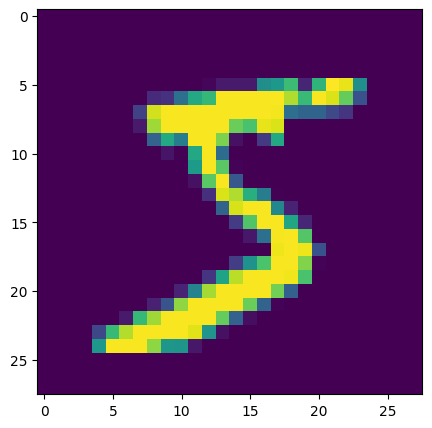

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(X_train[0]) # 이미지를 표시하는 함수
# imshow라고 하는 이미지 matplotlib 함수는 color 이미지를 처리할 수 있게 되어서 color가 기본
# plt.imshow(X_train[0], cmap = 'gray') 이렇게 주면 흑백으로 바뀌어서 보내짐

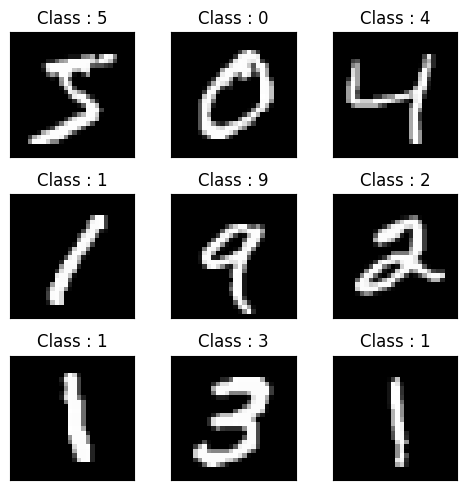

In [ ]:
# 위에는 하나만 시각화해보았는데 for문을 이용해서 여러개의 이미지를 시각화해보자
plt.figure(figsize=(5,5))

for i in range(9):
  plt.subplot(3,3, i+1) #subplot을 이용해서 3x3로 시각화하기 & matplotlib은 0이 없음 숫자니깐 1,2,3.. 이렇게 감
  plt.imshow(X_train[i], cmap = "gray")
  plt.title("Class : {}".format(y_train[i])) # X_train에 해당하는 정답 y_train, 숫자 데이터 0~9
  plt.xticks([]) # X축 눈금을 그냥 빈 리스트 []로 clear 시켜버림
  plt.yticks([]) # y축 눈금을 그냥 빈 리스트 []로 clear 시켜버림

plt.tight_layout() # 적당히 이미지 간의 간격을 띄워준다.

### scaling
- 0 `~` 1 사이로 pixel 값을 scale

In [ ]:
# 이미지 데이터는 스탠다드, MinMax 스케일링 다 사용이 가능하지만 심플 스케일링도 적용 가능
# 가장 간단하게 쓰이는 방법이 심플 스케일링 --> 성능 차이가 별로 안 난다.
X_train_scaled = X_train/255. # 최댓값으로 나눠주기, float로 만들어주기 위해 255. 해주기
X_test_scaled = X_test/255.

X_train_scaled.shape, X_test_scaled.shape # (60000, 28, 28) 앞에 6만은 배치 사이즈임,데이터 레코드 수가 6만개
# 실제 데이터는 28x28 부분 --> 근데 이 Con2D 라고 하는 이 layer 함수는 칼라 이미지를 처리할 수 있도록 만들어져 있음
# 지금은 흑백이기 때문에 칼라 이미지 입력 사양에 맞추려면 3D dimension으로 보내줘야함.
# 흑백이라면 (60000, 28, 28, 1) 칼라라면 (60000, 28, 28, 3)

((60000, 28, 28), (10000, 28, 28))

### Conv2D layer 의  입력 사양에 맞추어 3 dimension 으로 차원 증가

In [ ]:
# 우리가 항상 텐서플로우 또는 파이토치의 함수의 입력 사양에 맞춰줘야한다.
X_train_scaled = np.expand_dims(X_train_scaled, axis = 3) # np.expand_dims() --> 차원을 늘리는 함수
# axis = 3을 해주면 (60000, 28, 28,[]) 순서대로 0,1,2,3 --> [] 부분에 축을 하나 넣으라는거임
X_test_scaled = np.expand_dims(X_test_scaled, axis = 3)

X_train_scaled.shape, X_test_scaled.shape # 차원이 하나 증가했음 shape을 잘 확인해줘야함.
# 두,세번 실행하면 계속 축이 늘어남 --> 그래서 shape을 계속 확인해주기, 그래서 스케일링 전,후 변수명 따로 분리해주기!!

((60000, 28, 28, 1), (10000, 28, 28, 1))

### label 을 one-hot-encoding

In [ ]:
# 다중 분류니깐 categorical cross entropy --> 원-핫 인코딩이 돼있어야 실제값하고 예측값 간의 손실 계산이 가능하기 때문에
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_train_onehot = tf.keras.utils.to_categorical(y_train) # 원-핫 인코딩을 하라고 Keras에서 Utils가 제공이 됨
y_train_onehot[0] # 원래 위에서 y_train[0]는 5였음 --> 0,0,0,0,0,1,0,0,0,0 이런식으로 바뀜

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
y_train_onehot = tf.keras.utils.to_categorical(y_train)
y_test_onehot = tf.keras.utils.to_categorical(y_test)

y_train_onehot.shape, y_test_onehot.shape

((60000, 10), (10000, 10))

## tf.data 를 이용한 shuffling and batch 구성

 - GPU를 사용할 때 더욱 효율적으로 GPU에 데이터를 올릴 수 있도록 하기 위해서 구글에선 tf.data라고 하는 클래스를 제공해준다

-  tensor 데이터 타입으로 데이터를 바꿀 수 있도록 유틸리티를 제공해준다. --> GPU 빠르게 사용 가능


 - numpy 데이터는 그 자체론 CPU로만 돌아가는 데이터임 --> 내부적으로 numpy 데이터를 GPU에서 돌아갈 수 있도록 tensor 데이터 타입으로 바꿔주는 내부적으로 변환을 해줘야한다!! --> tf.data로는 변환없이 바로 GPU로 올릴 수 있음

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train_onehot)).shuffle(10000).batch(128)
# 튜플 형태로 X_train_scaled, y_train_onehot 이렇게 2개를 지정해준다 !!
# numpy 데이터가 tensor로 바뀜
# shuffle(버퍼 사이) --> 데이터를 섞어주기, batch(배치 사이즈) --> 배치 단위로 묶어서 GPU에 공급

# 훈련 데이터셋은 같은 데이터 묶음을 주게 되면 그 배치 묶음에 가중치가 과적합이 되게 때문에 shuffle을 해줌
# 테스트 데이터는 훈련된 데이터들을 측정하는 용도여서 shuffle을 안해줘도 됨, 배치 사이즈만 적용해줌
test_ds = tf.data.Dataset.from_tensor_slices((X_test_scaled,y_test_onehot)).batch(128)

In [ ]:
train_ds # 데이터 정보만 확인

<_BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, 10), dtype=tf.float64, name=None))>

In [ ]:
for x,y in train_ds :
  print(x)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]], shape=(128, 28, 28, 1), dtype=float64)
tf.Tensor(
[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

## LeNet 구성

<img src="https://d2l.ai/_images/lenet.svg" width="800" />

In [ ]:
# 이제 데이터셋 생성이 되었고 모델 학습을 해주는 단계
model = Sequential() # Sequential 모델

# 필터의 개수 : 6개, 커널 사이즈 : 5(5*5 사이즈로 컨볼루션) padding : same --> 사이즈가 줄어들지 않게 겉에 0으로 덧대다
model.add(Conv2D(6, kernel_size = 5, padding = 'same', input_shape = (28,28,1))) # 만약에 컬러 이미지면 (28,28,3)
model.add(Activation('relu')) # 여기까지가 활성화 함수까지 적용된 첫 번째 layer

model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2))) # 두 번째 layer : MaxPooling 작업
# 이 작업이 끝나면 28x28 사이즈 였던게 14x14로 줄어든다.

# 3번째 layer : C3 feature map
model.add(Conv2D(16,kernel_size = 5, padding = "valid")) # padding X
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

# 마지막에 이제 dense layer랑 연결해줘야함 --> Flattening 작업
model.add(Flatten())
model.add(Dense(120)) # Dense layer 120개랑 연결해주는 작업
model.add(Activation("relu"))

# 84개의 dense랑 연결해줌
model.add(Dense(84))
model.add(Activation("relu"))

# 마지막 단계 0~9 : 10개의 클래스를 가진 다중 분류 단계
model.add(Dense(10))
model.add(Activation("softmax")) # 마지막엔 항상 소프트맥스 함수를 사용해야함!! --> 다중 분류, 확률 분포

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 28, 28, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 10, 10, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 84)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 다중 분류의 손실함수는 카테고리컬 크로스 엔트로피
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# 모델 훈련

In [ ]:
history = model.fit(train_ds, epochs = 5, validation_data = test_ds) # 이미 위해서 배치 사이즈 128도 다 정했음
# 애포크는 5개만 돌리고, 검증 데이터는 위에서 test_ds 만들어놨던 것

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7989 - loss: 0.6869 - val_accuracy: 0.9697 - val_loss: 0.0917
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9738 - loss: 0.0853 - val_accuracy: 0.9818 - val_loss: 0.0584
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9813 - loss: 0.0573 - val_accuracy: 0.9835 - val_loss: 0.0486
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9869 - loss: 0.0445 - val_accuracy: 0.9867 - val_loss: 0.0402
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9887 - loss: 0.0351 - val_accuracy: 0.9875 - val_loss: 0.0388


# 손실함수, 정확도 출력

In [ ]:
score = model.evaluate(test_ds, verbose = 0) # 앞에 결과는 손실함수, 뒤는 accuracy 점수
print("마지막 loss = ", score[0])
print("마지막 accuaracy = ",score[1])

마지막 loss =  0.03880566358566284
마지막 accuaracy =  0.987500011920929


# 시각화

Text(0, 0.5, 'loss')

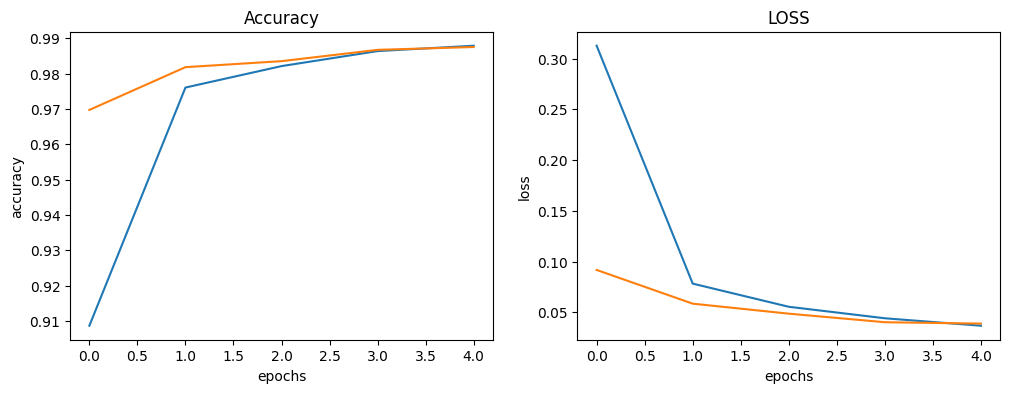

In [ ]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy") # 5번 에포크 돌리면 돌릴수록 정확도가 올라가는 것을 확인

plt.subplot(1,2,2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss") # 훈련 셋의 손실이 줄어들면서 검증용 데이터의 손실도 줄어든다

# 실습 : fashion MNIST 를 이용하여 위와 동일한 작업
이미지가 흐릿하기 때문에 구분이 어려움
이미지 사이즈는 28x28, 입력 사이즈가 손글씨 데이터랑 동일하므로 위에서 썼던 모델을 그대로 써도됨

Label	Class  
0	T-shirt/top  
1	Trouser  
2	Pullover  
3	Dress  
4	Coat  
5	Sandal  
6	Shirt  
7	Sneaker  
8	Bag  
9	Ankle boot

# 데이터셋 로드

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
np.random.seed(101)

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data() # 데이터셋 로드, 훈련, 검증용 분할

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 데이터셋 시각화

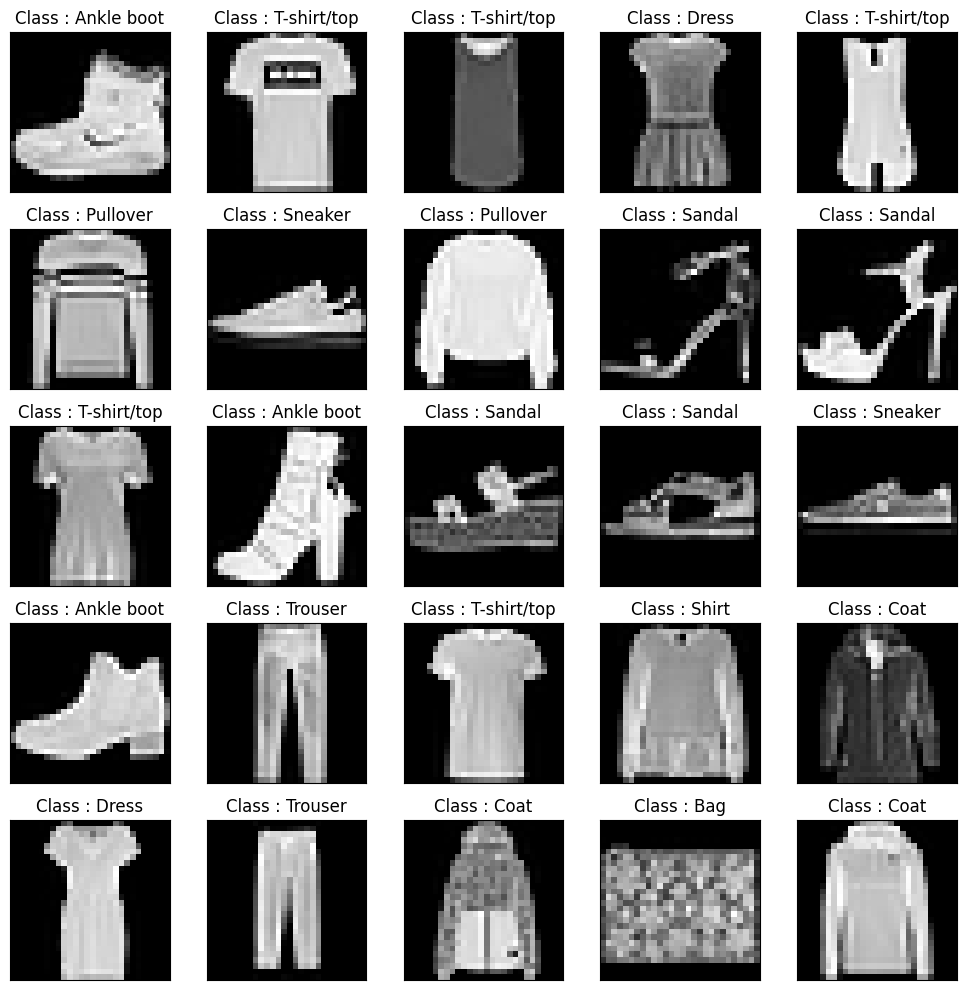

In [ ]:
# 위에는 하나만 시각화해보았는데 for문을 이용해서 여러개의 이미지를 시각화해보자
plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5, i+1)
  plt.imshow(X_train[i], cmap = "gray")

  # 전에는 y_train[i]이 0,1,2,, 이거였는데 class_name으로 바꿔줘야한다!!
  plt.title("Class : {}".format(class_names[y_train[i]]))
  plt.xticks([])
  plt.yticks([])

plt.tight_layout()

In [ ]:
X_train_scaled = X_train/255.
X_test_scaled = X_test/255.

X_train_scaled.shape, X_test_scaled.shape

((60000, 28, 28), (10000, 28, 28))

# 3D dimension 추가해주기


In [ ]:
X_train_scaled = np.expand_dims(X_train_scaled, axis = 3)
X_test_scaled = np.expand_dims(X_test_scaled, axis = 3)

X_train_scaled.shape, X_test_scaled.shape # (60000,28,28,1) 뒤에 1이 추가됨

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
y_train_onehot = tf.keras.utils.to_categorical(y_train)
y_test_onehot = tf.keras.utils.to_categorical(y_test)

y_train_onehot.shape, y_test_onehot.shape

((60000, 10), (10000, 10))

# 원-핫 인코딩

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train_onehot)).shuffle(10000).batch(128)
test_ds = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test_onehot)).batch(128)

# 모델 생성

In [ ]:
model = Sequential()

model.add(Conv2D(6, kernel_size = 3, padding = 'same', input_shape = (28,28,1))) # 만약에 컬러 이미지면 (28,28,3)
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

model.add(Conv2D(16,kernel_size = 3, padding = "valid"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

# 모델 추가해주기 (이미지 사이즈는 작게, 커널(필터)의 수는 많게)
# 근데 여기서 모델을 추가해주면 에러가 난다. 이미지 사이즈가 너무 작아져서
# 커널 사이즈를 줄여주기!! kernel_size = 3 으로 줄여줬음
# 데이터가 적은데 모델이 커지면 오히려 부정확해진다.
# 모델 추가해줬는데 정확도는 큰 차이가 없음
model.add(Conv2D(32,kernel_size = 3, padding = "valid")) # padding X
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))


model.add(Flatten())
model.add(Dense(120))
model.add(Activation("relu"))


model.add(Dense(84))
model.add(Activation("relu"))


model.add(Dense(10))
model.add(Activation("softmax"))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 6)           │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 28, 28, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 16)          │             880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 12, 12, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 120)                 │          15,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 84)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,074 (125.29 KB)

 Trainable params: 32,074 (125.29 KB)

 Non-trainable params: 0 (0.00 B)

# 모델 컴파일

In [ ]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# 모델 학습

In [ ]:
history = model.fit(train_ds, epochs = 5, validation_data = test_ds)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.6302 - loss: 1.0563 - val_accuracy: 0.8103 - val_loss: 0.5106
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8322 - loss: 0.4621 - val_accuracy: 0.8531 - val_loss: 0.4131
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8587 - loss: 0.3853 - val_accuracy: 0.8616 - val_loss: 0.3782
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8739 - loss: 0.3446 - val_accuracy: 0.8695 - val_loss: 0.3636
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8819 - loss: 0.3190 - val_accuracy: 0.8761 - val_loss: 0.3411


# 모델 평가

In [ ]:
score = model.evaluate(test_ds, verbose = 0) # 앞에 결과는 손실함수, 뒤는 accuracy 점수
print("마지막 loss = ", score[0])
print("마지막 accuaracy = ",score[1])

마지막 loss =  0.3411024212837219
마지막 accuaracy =  0.8761000037193298


# 시각화

Text(0, 0.5, 'loss')

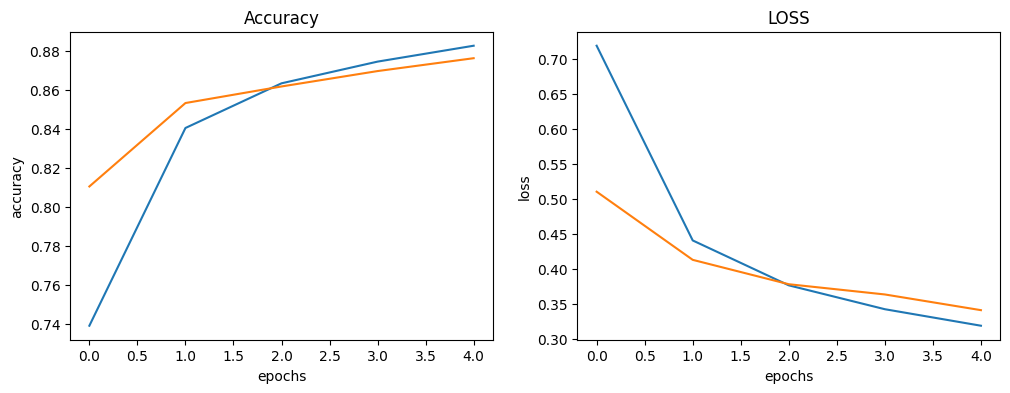

In [ ]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy") # 5번 에포크 돌리면 돌릴수록 정확도가 올라가는 것을 확인

plt.subplot(1,2,2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss") # 훈련 셋의 손실이 줄어들면서 검증용 데이터의 손실도 줄어든다

# 그래도 개선은 되고 있음

In [ ]:
y_pred = model.predict(X_test).argmax(axis = 1) # 가장 큰 것만 나옴
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([9, 2, 1, ..., 8, 1, 5])

# 히트맵 시각화

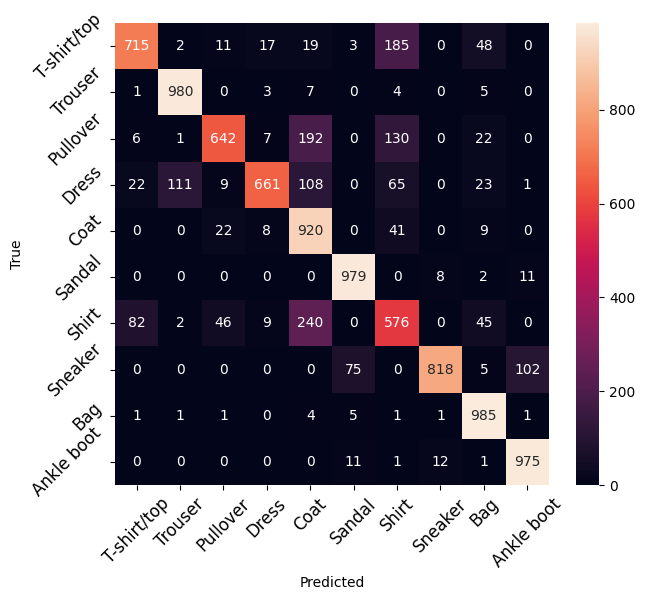

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize = (7,6))
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt = 'd')

# 클래스 이름 추가하기
ax.set_xticklabels(class_names, rotation = 45, fontsize = 12) # 글씨가 잘 보이게 45도 회
ax.set_yticklabels(class_names, rotation = 45, fontsize = 12)

# x,y축 이름 설정해주기
ax.set_ylabel("True")
ax.set_xlabel("Predicted")
plt.show()